In [1]:
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, Flatten, MaxPooling2D, BatchNormalization, \
SpatialDropout2D, GlobalMaxPooling2D, Input, LeakyReLU, AveragePooling2D, MaxPool2D, Concatenate, Lambda
from tensorflow.keras.utils import Sequence
import pandas as pd
import numpy as np
import os
import random
import cv2

import pickle



INPUT_FOLDER = 'C:/Users/alexa/___Licenta_v2/dataset/train/'
OUTPUT_FOLDER = 'D:/Licenta/new_try_kaggle/cnn_models/'
OUTPUT_FOLDER_TB = 'D:/Licenta/new_try_kaggle/cnn_models/tensor_boards/'

train_samples = os.listdir(INPUT_FOLDER)
train_samples.sort()
random.seed(30)
random.shuffle(train_samples)

labels_df = pd.read_csv('D:/Licenta/new_try_kaggle/train_labels.csv', index_col=0)
labels_df['label'] = labels_df['label'].astype(object) 

In [4]:
partition = dict()
all_labels = dict()
partition['train'] = train_samples[:190000]
partition['validate'] = train_samples[190000:210000]
partition['test'] = train_samples[210000:]

all_cancer = list()

for sample in train_samples:
    
    label = labels_df.get_value(sample[:-4], 'label')
    all_labels[sample] = label
      
train_cancer = 0
train_non_cancer = 0

for key in partition['validate']:
    if all_labels[key] == 1:
        train_cancer+=1
    else:
        train_non_cancer+=1
        
print(f"cancer-{repr(train_cancer)}-non_cancer-{repr(train_non_cancer)}")

C:\Users\alexa\AppData\Local\conda\conda\envs\licentav2\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


cancer-8152-non_cancer-11848


In [3]:
total_pixels_vals_b = 0
total_pixels_vals_g = 0
total_pixels_vals_r = 0
total_pixels_vals_grey = 0


total_pixels= 190000 *32 *32



i = 0
for sample in partition['train']:
    i+=1
    if i%10000 == 0:
        print(i)
    img_array_greyscale = cv2.imread(os.path.join(INPUT_FOLDER, sample),cv2.IMREAD_GRAYSCALE)
    img_array_greyscale = img_array_greyscale[32:64,32:64,]
    temp_greyscale = img_array_greyscale.sum()
    
    img_array_rgb = cv2.imread(os.path.join(INPUT_FOLDER, sample))
    img_array_rgb = img_array_rgb[32:64,32:64,]
    
    total_pixels_vals_grey +=temp_greyscale
    total_pixels_vals_r += img_array_rgb[:,:,0].sum()
    total_pixels_vals_g += img_array_rgb[:,:,1].sum()
    total_pixels_vals_b += img_array_rgb[:,:,2].sum()


total_pixels_vals_r /= 255.0
total_pixels_vals_g /= 255.0
total_pixels_vals_b /= 255.0

total_pixels_vals_r /= total_pixels
total_pixels_vals_g /= total_pixels
total_pixels_vals_b /= total_pixels


total_pixels_vals_grey /= 255.0
total_pixels_vals_grey /= total_pixels

print(total_pixels_vals_r)
print(total_pixels_vals_g)
print(total_pixels_vals_b)
print(total_pixels_vals_grey)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
0.6959249435226393
0.5449842052051084
0.7023795146212268
0.609289586659088


(32, 32, 3)


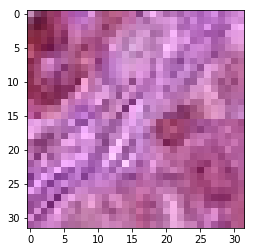

In [7]:
img_array = cv2.imread(os.path.join(INPUT_FOLDER, '000aa5d8f68dc1f45ebba53b8f159aae80e06072.tif'))

img_array = img_array[32:64,32:64,]
print(img_array.shape)
plt.imshow(img_array)
plt.show()